In [42]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier, plot_tree, export_text
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.preprocessing import LabelEncoder, minmax_scale, MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
import warnings
warnings.filterwarnings("ignore")

In [ ]:
# Scaling Technique / Normalization:- Whenever we want to bring the data into a common scale, then we use scaling techniques. (OR)
# Whenever the attributes are dominating, specifically when you're working with "Distance" metrics, then we do scaling.
# There are different types of scaling, such as

# Min-Max Scaling :- Min-Max scaling will bring any data to a scale of 0 to 1. (whatever may be the range of data)
# Formula = (X - Min_value)/(Max_value - Min_value)

# Z-Score Normalization :-
# Formula = (X - mean(X))/(Standard_Deviation)

In [39]:
# Manually caluclating Min-Max Scaling eg:-

marks = np.array([1,2,3,4,5])
(marks - np.min(marks))/(np.max(marks) - np.min(marks))

array([0.  , 0.25, 0.5 , 0.75, 1.  ])

In [41]:
# Direct function for caluclating Min-Max Scaling eg:-

minmax_scale(marks)

array([0.  , 0.25, 0.5 , 0.75, 1.  ])

In [43]:
# 2nd way for caluclating Min-Max Scaling eg:-

scaling = MinMaxScaler()
scaling.fit_transform(marks.reshape(5,1))

array([[0.  ],
       [0.25],
       [0.5 ],
       [0.75],
       [1.  ]])

In [2]:
fruits = pd.read_csv("E:/Python Programs/fruits.csv")
fruits.head()

,color,sphericity,weight,label
0,Orange,0.947,120,Orange
1,Orange,0.917,125,Orange
2,Orange,0.923,110,Orange
3,Orange,0.916,123,Orange
4,Orange,0.943,124,Orange


In [3]:
X = fruits[["sphericity", "weight"]]
y = fruits["label"]

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.25, random_state=10)
X_train.shape, y_train.shape

((45, 2), (45,))

In [5]:
X_train.index, y_train.index

(Index([ 6, 45, 57, 47, 10, 44, 50, 18,  4,  1, 12, 30, 22, 54, 32, 53, 19, 34,
         5, 13, 14, 41, 51, 33, 24, 11, 43, 16, 58, 40, 42, 56, 59,  8, 55, 52,
        48, 29, 25, 28, 49,  0, 15, 36,  9],
       dtype='int64'),
 Index([ 6, 45, 57, 47, 10, 44, 50, 18,  4,  1, 12, 30, 22, 54, 32, 53, 19, 34,
         5, 13, 14, 41, 51, 33, 24, 11, 43, 16, 58, 40, 42, 56, 59,  8, 55, 52,
        48, 29, 25, 28, 49,  0, 15, 36,  9],
       dtype='int64'))

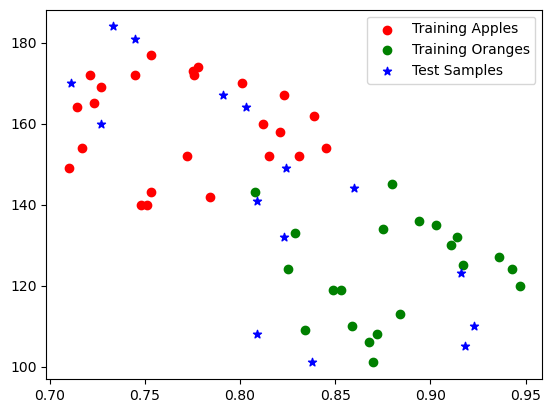

In [6]:
plt.scatter(data=X_train[y_train=="Apple"], x="sphericity", y="weight", c="red", label="Training Apples")
plt.scatter(data=X_train[y_train=="Orange"], x="sphericity", y="weight", c="green", label="Training Oranges")
plt.scatter(data=X_test, x="sphericity", y="weight", marker="*", c="blue", label="Test Samples")
plt.legend()
plt.show()

In [7]:
model = KNeighborsClassifier(n_neighbors=3)
model.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [8]:
y_predict = model.predict(X_test)
y_predict

array(['Apple', 'Orange', 'Apple', 'Orange', 'Apple', 'Orange', 'Apple',
       'Orange', 'Apple', 'Orange', 'Apple', 'Apple', 'Orange', 'Apple',
       'Orange'], dtype=object)

In [9]:
accuracy_score(y_test, y_predict)

0.8666666666666667

In [10]:
confusion_matrix(y_test, y_predict)

array([[6, 0],
       [2, 7]], dtype=int64)

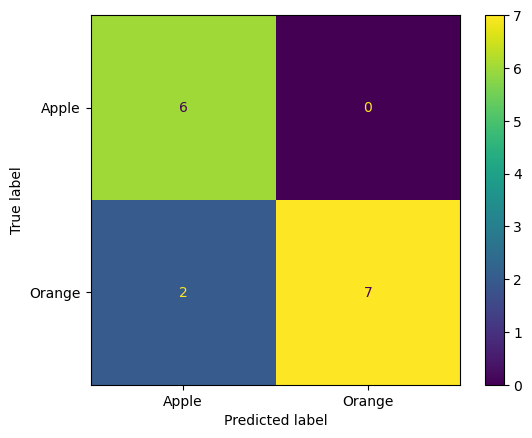

In [11]:
ConfusionMatrixDisplay.from_predictions(y_test, y_predict)
plt.show()

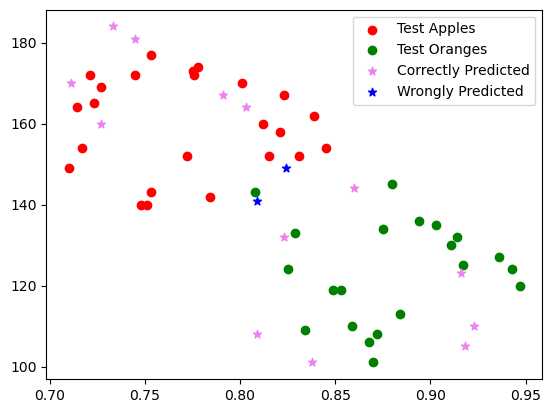

In [36]:
plt.scatter(data=X_train[y_train=="Apple"], x="sphericity", y="weight", c="red", label="Test Apples")
plt.scatter(data=X_train[y_train=="Orange"], x="sphericity", y="weight", c="green", label="Test Oranges")
plt.scatter(data=X_test[y_predict==y_test], x="sphericity", y="weight", c="violet", marker='*', label="Correctly Predicted")
plt.scatter(data=X_test[y_predict!=y_test], x="sphericity", y="weight", c="blue", marker='*', label="Wrongly Predicted")
plt.legend()
plt.show()

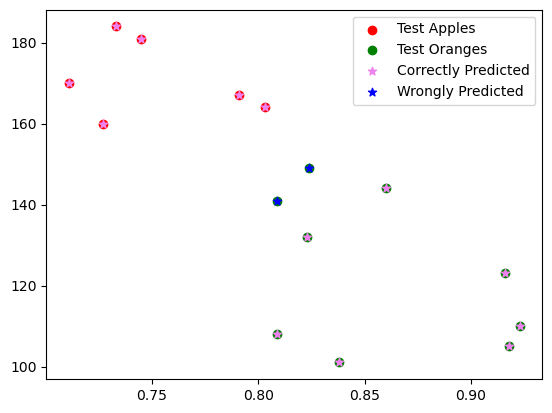

In [35]:
plt.scatter(data=X_test[y_test=="Apple"], x="sphericity", y="weight", c="red", label="Test Apples")
plt.scatter(data=X_test[y_test=="Orange"], x="sphericity", y="weight", c="green", label="Test Oranges")
plt.scatter(data=X_test[y_predict==y_test], x="sphericity", y="weight", c="violet", marker='*', label="Correctly Predicted")
plt.scatter(data=X_test[y_predict!=y_test], x="sphericity", y="weight", c="blue", marker='*', label="Wrongly Predicted")
plt.legend()
plt.show()

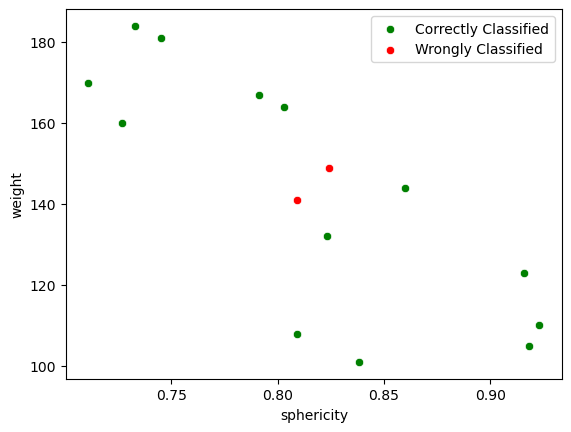

In [20]:
sns.scatterplot(data=X_test[y_test==y_predict], x="sphericity", y="weight", c="green", label="Correctly Classified")
sns.scatterplot(data=X_test[y_test!=y_predict], x="sphericity", y="weight", c="red", label="Wrongly Classified")
plt.xlabel("sphericity")
plt.ylabel("weight")
plt.legend()
plt.show()

In [46]:
y_test[y_test!=y_predict]

21    Orange
23    Orange
Name: label, dtype: object